# MoodMirror - Facial Emotion Detection

In this notebook, we will train a deep learning model for facial emotion detection using the "fer2013" dataset from Kaggle. The model will classify facial emotions into seven categories: Angry, Disgust, Fear, Happy, Neutral, Sad, and Surprise.


In [3]:
# Importing necessary libraries and modules
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics
import seaborn as sns
from keras.callbacks import TensorBoard
import datetime

In [4]:
# Setting up the TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

## Data Preprocessing

We will define the image dimensions, set the batch size, and specify the paths for our training and validation datasets. We will also use Keras's ImageDataGenerator to apply real-time data augmentation to the images.


In [5]:
# Setting image dimensions and batch size
IMG_HEIGHT = 48
IMG_WIDTH = 48
batch_size = 32

# Paths for training and validation datasets
train_data_dir = "data/train/"
test_data_dir = "data/test/"

# Creating ImageDataGenerators for training and validation datasets
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)

# Loading training and validation data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode="grayscale",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode="grayscale",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    subset='validation'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Visualizing Training Data

Let's visualize a random image from the training dataset along with its label.


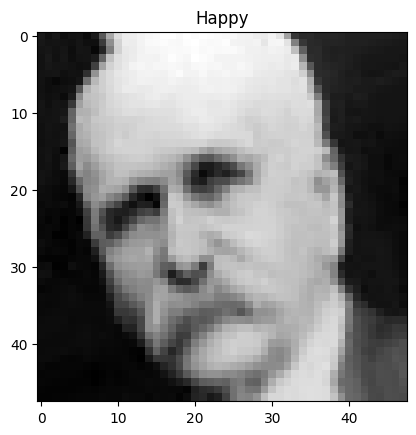

In [6]:
# Displaying a random image from the training dataset
class_labels = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
img, label = train_generator.__next__()
i = np.random.randint(0, img.shape[0])
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:, :, 0], cmap="gray")
plt.title(labl)
plt.show()


## Model Architecture

We will define a sequential model with multiple convolutional layers, max-pooling layers, dropout layers, and dense layers.


In [7]:
# Defining the model architecture
model = Sequential()

# Adding layers to the model
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(256, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(7, activation="softmax"))

# Compiling the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

## Training the Model

We will train the model using the training data and validate it using the validation data. After training, we will save the model for future use.


In [8]:
# Calculating the number of images in training and test datasets
num_train_imgs = sum([len(files) for r, d, files in os.walk(train_data_dir)])*.8
num_val_imgs = sum([len(files) for r, d, files in os.walk(train_data_dir)])*.2

# Training the model
epochs = 20 # will be: 50
history = model.fit(
    train_generator,
    steps_per_epoch=num_train_imgs // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=num_test_imgs // batch_size,
    callbacks=[tensorboard_callback] # Adding tensorboard callback here
)

# Saving the trained model
model.save("emotion_detection_model_100epochs.h5")

Epoch 1/50
897/897 [==============================] - 204s 226ms/step - loss: 1.7589 - accuracy: 0.2803 - val_loss: 1.6574 - val_accuracy: 0.3537
Epoch 2/50
897/897 [==============================] - 86s 96ms/step - loss: 1.6178 - accuracy: 0.3622 - val_loss: 1.4367 - val_accuracy: 0.4474
Epoch 3/50
897/897 [==============================] - 85s 95ms/step - loss: 1.4966 - accuracy: 0.4199 - val_loss: 1.3408 - val_accuracy: 0.4842
Epoch 4/50
897/897 [==============================] - 86s 96ms/step - loss: 1.4152 - accuracy: 0.4554 - val_loss: 1.2857 - val_accuracy: 0.4983
Epoch 5/50
897/897 [==============================] - 91s 101ms/step - loss: 1.3628 - accuracy: 0.4786 - val_loss: 1.2286 - val_accuracy: 0.5268
Epoch 6/50
897/897 [==============================] - 89s 100ms/step - loss: 1.3268 - accuracy: 0.4933 - val_loss: 1.2077 - val_accuracy: 0.5361
Epoch 7/50
897/897 [==============================] - 87s 97ms/step - loss: 1.2984 - accuracy: 0.4998 - val_loss: 1.2063 - val_accur

KeyboardInterrupt: 

## Visualizing Training Results

We will plot the training and validation loss and accuracy over the epochs to visualize the performance of our model during training.


In [ ]:
# Plotting training and validation loss
plt.plot(history.history["loss"], "y", label="Training loss")
plt.plot(history.history["val_loss"], "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(history.history["accuracy"], "y", label="Training accuracy")
plt.plot(history.history["val_accuracy"], "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## Testing the Model

We will load the trained model and test its performance on a batch of validation images. We will also visualize the confusion matrix to see the accuracy of each class.


In [ ]:
# Loading the trained model
my_model = load_model("emotion_detection_model_100epochs.h5", compile=False)

# Making predictions on a batch of validation images
test_img, test_lbl = validation_generator.__next__()
predictions = my_model.predict(test_img)
predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

# Calculating and printing the accuracy
print("Accuracy =", metrics.accuracy_score(test_labels, predictions))

# Displaying the confusion matrix
cm = metrics.confusion_matrix(test_labels, predictions)
sns.heatmap(cm, annot=True)

# Displaying a random image from the validation dataset with its original and predicted labels
n = np.random.randint(0, test_img.shape[0])
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:, :, 0], cmap="gray")
plt.title(f"Original label: {orig_labl} | Predicted: {pred_labl}")
plt.show()

# Conclusion

We successfully trained a deep learning model for facial emotion detection using the "fer2013" dataset. The model can classify facial emotions into seven categories with reasonable accuracy. Further improvements can be made by fine-tuning the model, using a larger dataset, or employing more advanced architectures.
